In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Note: The file uses semicolons as separators, so specify sep=';'
df = pd.read_csv('bank-additional.csv', sep=';')

# Display the first few rows of the DataFrame
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Accuracy: 0.9110032362459547

Confusion Matrix:
[[522  37]
 [ 18  41]]

Classification Report:
              precision    recall  f1-score   support

          no       0.97      0.93      0.95       559
         yes       0.53      0.69      0.60        59

    accuracy                           0.91       618
   macro avg       0.75      0.81      0.77       618
weighted avg       0.92      0.91      0.92       618



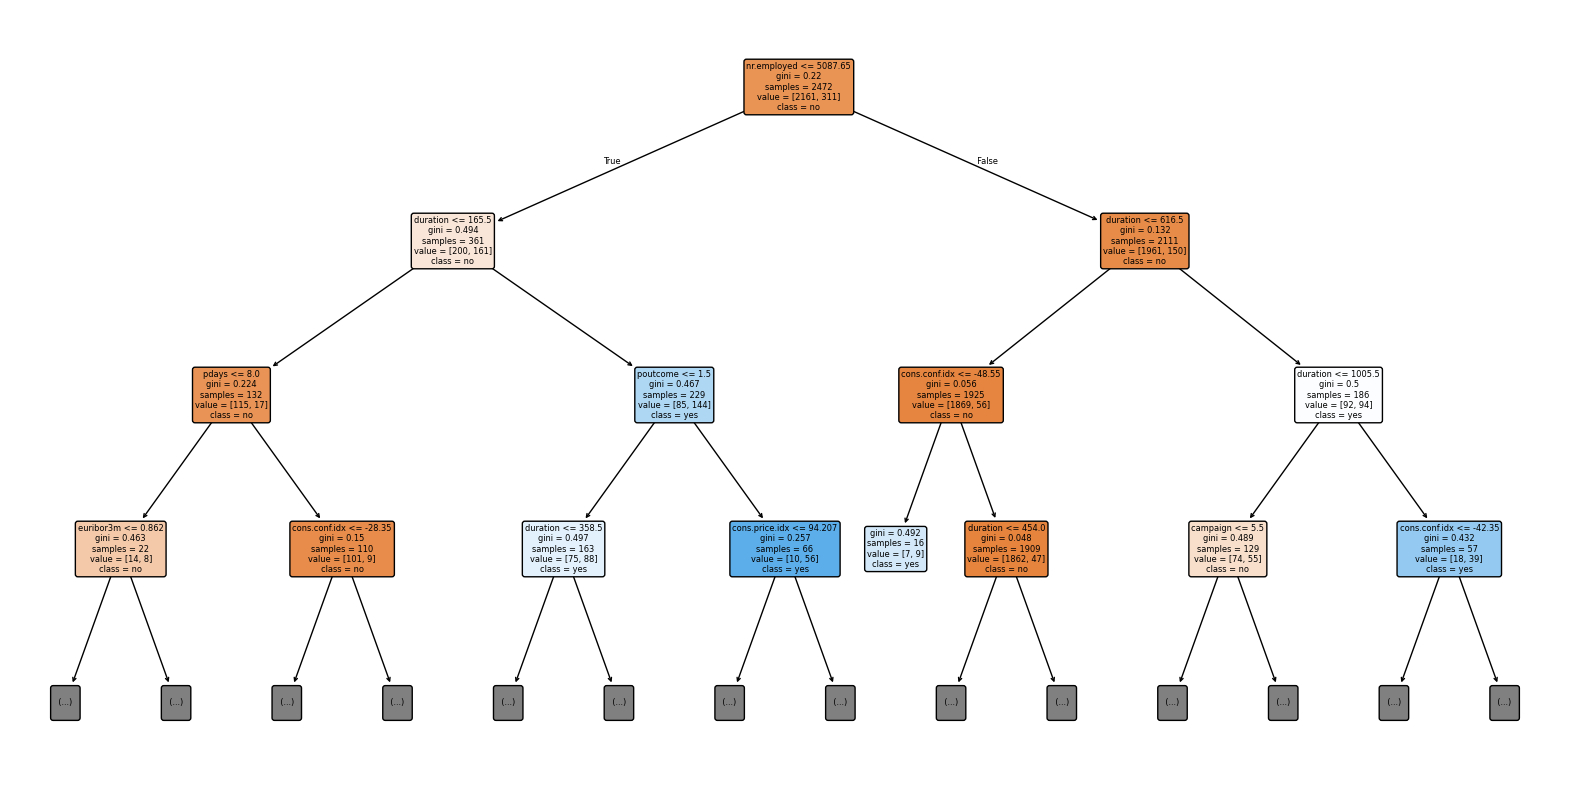


Feature Importances:
                importance
duration          0.502010
nr.employed       0.326585
cons.conf.idx     0.059139
poutcome          0.033718
contact           0.017715
euribor3m         0.015441
cons.price.idx    0.011796
pdays             0.010973
day_of_week       0.008153
campaign          0.008091
education         0.004579
age               0.001800
marital           0.000000
job               0.000000
housing           0.000000
loan              0.000000
month             0.000000
default           0.000000
emp.var.rate      0.000000
previous          0.000000


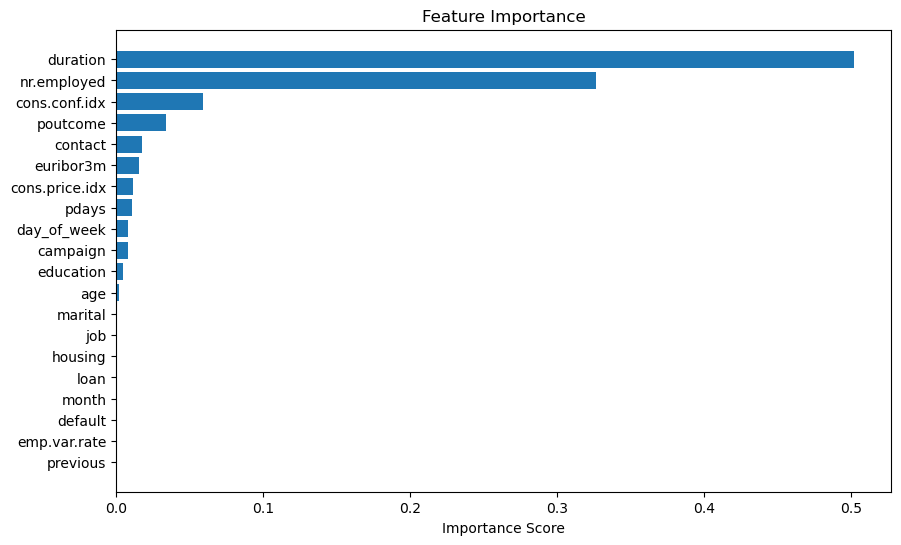

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('bank-additional.csv', sep=';')

# Handle missing values
data = data.replace('unknown', pd.NA)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                   'contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Encode target variable
le_y = LabelEncoder()
data['y'] = le_y.fit_transform(data['y'])

# Separate features and target
X = data.drop('y', axis=1)
y = data['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_classifier.fit(X_train, y_train)

# Evaluate
y_pred = dt_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_y.classes_))

# Visualize the tree with corrected class names
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, 
               feature_names=X.columns, 
               class_names=le_y.classes_,  # Use the original string class names
               filled=True, 
               rounded=True, 
               max_depth=3)
plt.show()

# Feature importance
feature_importances = pd.DataFrame(dt_classifier.feature_importances_,
                                 index=X.columns,
                                 columns=['importance']).sort_values('importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()